In [1]:
!pip install selenium


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from bs4 import BeautifulSoup

In [3]:
driver = webdriver.Chrome()
driver.get('https://amchainitiative.org/azf-barometer/?ppwp=1#anti-zionist-faculty-barometer/?ppwp=1&view_433_per_page=1000&view_433_page=1')

In [4]:
page_source = driver.page_source

soup = BeautifulSoup(page_source, 'html')

print(soup)

<html lang="en-US"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=10.0, user-scalable=yes" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<!-- This site is optimized with the Yoast SEO plugin v22.8 - https://yoast.com/wordpress/plugins/seo/ -->
<title>Anti-Zionist Faculty Barometer | AMCHA Initiative</title>
<meta content="The Anti-Zionist Faculty (AZF) Barometer provides a comprehensive ranking system to measure the presence and activity of anti-Zionist faculty on U.S. college campuses. Using publicly available data, the Barometer evaluates factors that include the presence and activity of Faculty for Justice in Palestine (FJP) chapters, the number of faculty members who support academic boycotts of Israel, and whether academic departments have issued anti-Zionist statements. Rankings range from 0 (Neglig

In [51]:
info = soup.find_all('div', class_="fl-rich-text")
info

[<div class="fl-rich-text">
 <p><em>Explore the Anti-Zionist Faculty (AZF) Barometer, a powerful ranking tool that measures the prevalence of anti-Zionist faculty on U.S. campuses, empowering stakeholders to advocate for stronger protections against the normalization of academic antisemitism.</em></p>
 <p style="text-align: center;">For further information, see the <a href="https://amchainitiative.org/wp-content/uploads/2024/12/Guide-to-AZM-Barometer.pdf">Guide to the AZF Barometer</a></p>
 <p style="text-align: center;"><a href="#search">Jump to Search</a></p>
 </div>,
 <div class="fl-rich-text">
 <h4><strong>An Overview of the Anti-Zionist Faculty (AZF) Barometer</strong></h4>
 </div>,
 <div class="fl-rich-text">
 <p><strong>About the Barometer:</strong></p>
 <p>The <strong>Anti-Zionist Faculty (AZF) Barometer</strong> provides a ranking system to measure the presence and activity of anti-Zionist faculty on U.S. college campuses. AMCHA Initiative’s <a href="https://amchainitiative.or

In [6]:
for p in info:
    print(p.text)
    print("")


Explore the Anti-Zionist Faculty (AZF) Barometer, a powerful ranking tool that measures the prevalence of anti-Zionist faculty on U.S. campuses, empowering stakeholders to advocate for stronger protections against the normalization of academic antisemitism.
For further information, see the Guide to the AZF Barometer
Jump to Search



An Overview of the Anti-Zionist Faculty (AZF) Barometer



About the Barometer:
The Anti-Zionist Faculty (AZF) Barometer provides a ranking system to measure the presence and activity of anti-Zionist faculty on U.S. college campuses. AMCHA Initiative’s research shows a strong correlation between anti-Zionist faculty presence and the severity of campus antisemitism, including physical assaults, threats, and harassment targeting Jewish students.
The rise of Faculty for Justice in Palestine (FJP), a network of over 170 campus chapters established after Hamas' October 7, 2023 attack, has exacerbated this issue. FJP was launched in response to a call from the 

In [7]:
table = soup.find('div', class_='kn-table-wrapper')
table

<div class="kn-table-wrapper">
<table class="kn-table kn-table-table knTable knTable--clean knTable--spacing-large">
<thead>
<tr><th class="field_246">
<span class="table-fixed-label">
<a address="true" class="kn-sort level is-compact" href="#field_246-field_246|asc">
<span>College/University</span>
</a>
</span>
</th>
<th class="field_294">
<span class="table-fixed-label">
<a address="true" class="kn-sort level is-compact" href="#field_294|asc">
<span>School Rankings</span>
</a>
</span>
</th>
<th class="field_249">
<span class="table-fixed-label">
<a address="true" class="kn-sort level is-compact" href="#field_249|asc">
<span># Faculty Boycotters</span>
</a>
</span>
</th>
<th class="field_252">
<span class="table-fixed-label">
<a address="true" class="kn-sort level is-compact" href="#field_252|asc">
<span>FJP (Y/N)</span>
</a>
</span>
</th>
<th class="field_259">
<span class="table-fixed-label">
<a address="true" class="kn-sort level is-compact" href="#field_259|asc">
<span>FJP Events 

In [8]:
# table header column names 
for th in table.find_all('th'):
    print(th.text.strip())

College/University
School Rankings
# Faculty Boycotters
FJP (Y/N)
FJP Events & Statements
Depts w/Statements (Y/N)
View More


In [9]:
column_titles = []

for th in table.find_all('th'):
    column_titles.append(th.text.strip())

column_titles

    

['College/University',
 'School Rankings',
 '# Faculty Boycotters',
 'FJP (Y/N)',
 'FJP Events & Statements',
 'Depts w/Statements (Y/N)',
 'View More']

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(columns=column_titles[:-1])
df

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N)


### Scraping each row of data 

In [12]:
data = table.find_all('tr')[1:]
data[0]

<tr id="674f85e1d516bc02d4922901">
<td class="field_246 cell-edit" data-column-index="0" data-field-key="field_246" style="font-weight: bold; "><span class="col-0">
<span class="5b4bd8b22d7f5f28788b16d3">New York University (NYU)</span>
</span></td>
<td class="field_294 cell-edit" data-column-index="1" data-field-key="field_294" style="text-align: center; background-color:#c30b01; font-weight: bold; color:#ffffff; "><span class="col-1">
5 - Extreme
  </span></td>
<td class="field_249 cell-edit" data-column-index="2" data-field-key="field_249" style="text-align: center; "><span class="col-2">
123
  </span></td>
<td class="field_252 cell-edit" data-column-index="3" data-field-key="field_252" style="text-align: center; "><span class="col-3">
Yes
  </span></td>
<td class="field_259 cell-edit" data-column-index="4" data-field-key="field_259" style="text-align: center; "><span class="col-4">
44
  </span></td>
<td class="field_261 cell-edit" data-column-index="5" data-field-key="field_261" st

In [52]:
row_data = data[0].find_all('td')
for data_point in row_data[:-1]:
    print(data_point.text.strip())

New York University (NYU)
5 - Extreme
123
Yes
44
Yes


In [53]:
schools = []
for row in data: 
    row_data = row.find_all('td')
    school_data = [data_point.text.strip() for data_point in row_data[:-1]]
    schools.append(school_data)

In [56]:
schools[:5]

[['New York University (NYU)', '5 - Extreme', '123', 'Yes', '44', 'Yes'],
 ['University of Minnesota Twin Cities',
  '5 - Extreme',
  '38',
  'Yes',
  '54',
  'Yes'],
 ['Columbia University/Barnard College',
  '5 - Extreme',
  '72',
  'Yes',
  '27',
  'Yes'],
 ['University of California Santa Cruz (UCSC)',
  '5 - Extreme',
  '38',
  'Yes',
  '40',
  'Yes'],
 ['University of Washington', '5 - Extreme', '76', 'Yes', '21', 'Yes']]

### Construct dataframe

In [16]:
df

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N)


In [17]:
for school in schools:
    length = len(df)

    df.loc[length] = school

In [18]:
df

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N)
0,New York University (NYU),5 - Extreme,123,Yes,44,Yes
1,University of Minnesota Twin Cities,5 - Extreme,38,Yes,54,Yes
2,Columbia University/Barnard College,5 - Extreme,72,Yes,27,Yes
3,University of California Santa Cruz (UCSC),5 - Extreme,38,Yes,40,Yes
4,University of Washington,5 - Extreme,76,Yes,21,Yes
...,...,...,...,...,...,...
721,Wright Institute,0 - Negligible,1,No,0,No
722,Xavier University,0 - Negligible,0,No,0,No
723,Yeshiva University,0 - Negligible,0,No,0,No
724,Youngstown State University,0 - Negligible,0,No,0,No


In [19]:
school_rankings = []
for ranking in df['School Rankings']:
    school_ranking = ranking.split('-')
    school_ranking = (int(school_ranking[0].strip()), school_ranking[1].strip())
    print(school_ranking)
    school_rankings.append(school_ranking)
school_rankings

(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(5, 'Extreme')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(4, 'Severe')
(3, 'Significant')
(3, 'Significant')
(3, 'Significant')
(3, 'Significant')
(3, 'Signifi

[(5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (5, 'Extreme'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Severe'),
 (4, 'Seve

In [20]:
df['School Rankings #'] = [ranking[0] for ranking in school_rankings]
df['School Rankings Text'] = [ranking[1] for ranking in school_rankings]
df

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N),School Rankings #,School Rankings Text
0,New York University (NYU),5 - Extreme,123,Yes,44,Yes,5,Extreme
1,University of Minnesota Twin Cities,5 - Extreme,38,Yes,54,Yes,5,Extreme
2,Columbia University/Barnard College,5 - Extreme,72,Yes,27,Yes,5,Extreme
3,University of California Santa Cruz (UCSC),5 - Extreme,38,Yes,40,Yes,5,Extreme
4,University of Washington,5 - Extreme,76,Yes,21,Yes,5,Extreme
...,...,...,...,...,...,...,...,...
721,Wright Institute,0 - Negligible,1,No,0,No,0,Negligible
722,Xavier University,0 - Negligible,0,No,0,No,0,Negligible
723,Yeshiva University,0 - Negligible,0,No,0,No,0,Negligible
724,Youngstown State University,0 - Negligible,0,No,0,No,0,Negligible


In [21]:
df['# Faculty Boycotters'] = df['# Faculty Boycotters'].astype(int)
df['FJP Events & Statements'] = df['FJP Events & Statements'].astype(int)

df

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N),School Rankings #,School Rankings Text
0,New York University (NYU),5 - Extreme,123,Yes,44,Yes,5,Extreme
1,University of Minnesota Twin Cities,5 - Extreme,38,Yes,54,Yes,5,Extreme
2,Columbia University/Barnard College,5 - Extreme,72,Yes,27,Yes,5,Extreme
3,University of California Santa Cruz (UCSC),5 - Extreme,38,Yes,40,Yes,5,Extreme
4,University of Washington,5 - Extreme,76,Yes,21,Yes,5,Extreme
...,...,...,...,...,...,...,...,...
721,Wright Institute,0 - Negligible,1,No,0,No,0,Negligible
722,Xavier University,0 - Negligible,0,No,0,No,0,Negligible
723,Yeshiva University,0 - Negligible,0,No,0,No,0,Negligible
724,Youngstown State University,0 - Negligible,0,No,0,No,0,Negligible


In [22]:
df.loc[0]

College/University          New York University (NYU)
School Rankings                           5 - Extreme
# Faculty Boycotters                              123
FJP (Y/N)                                         Yes
FJP Events & Statements                            44
Depts w/Statements (Y/N)                          Yes
School Rankings #                                   5
School Rankings Text                          Extreme
Name: 0, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   College/University        726 non-null    object
 1   School Rankings           726 non-null    object
 2   # Faculty Boycotters      726 non-null    int64 
 3   FJP (Y/N)                 726 non-null    object
 4   FJP Events & Statements   726 non-null    int64 
 5   Depts w/Statements (Y/N)  726 non-null    object
 6   School Rankings #         726 non-null    int64 
 7   School Rankings Text      726 non-null    object
dtypes: int64(3), object(5)
memory usage: 67.2+ KB


In [24]:
df.describe()

,# Faculty Boycotters,FJP Events & Statements,School Rankings #
count,726.000000,726.000000,726.000000
mean,6.323691,2.286501,0.900826
std,16.179976,6.452202,1.469159
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,4.000000,0.000000,2.000000
max,184.000000,54.000000,5.000000


In [25]:
correlation_matrix = df[['# Faculty Boycotters', 'FJP Events & Statements', 'School Rankings #']].corr()
correlation_matrix

,# Faculty Boycotters,FJP Events & Statements,School Rankings #
# Faculty Boycotters,1.000000,0.498678,0.620712
FJP Events & Statements,0.498678,1.000000,0.702165
School Rankings #,0.620712,0.702165,1.000000


In [26]:
import matplotlib.pyplot as plt

In [27]:
ranking_counts = df['School Rankings #'].value_counts()
print(ranking_counts)

School Rankings #
0    485
2     78
3     58
1     42
4     33
5     30
Name: count, dtype: int64


In [28]:
td_tags = soup.find_all('td', style=True)
td_tags[1]

<td class="field_294 cell-edit" data-column-index="1" data-field-key="field_294" style="text-align: center; background-color:#c30b01; font-weight: bold; color:#ffffff; "><span class="col-1">
5 - Extreme
  </span></td>

In [29]:
background_colors = []
for td in td_tags:
    styles = td['style']
    #print(style)
    styles = styles.split(';')
    #print(styles)
    for style in styles:
        if 'background-color' in style:
            #print(style)
            background_color = style.split(':')[1]
            #print(background_color)
            if background_color not in background_colors:
                background_colors.append(background_color)
print(background_colors)
background_colors.reverse()
print(background_colors)


['#c30b01', '#d96700', '#deaf00', '#eada00', '#d4d200', '#99ba00']
['#99ba00', '#d4d200', '#eada00', '#deaf00', '#d96700', '#c30b01']


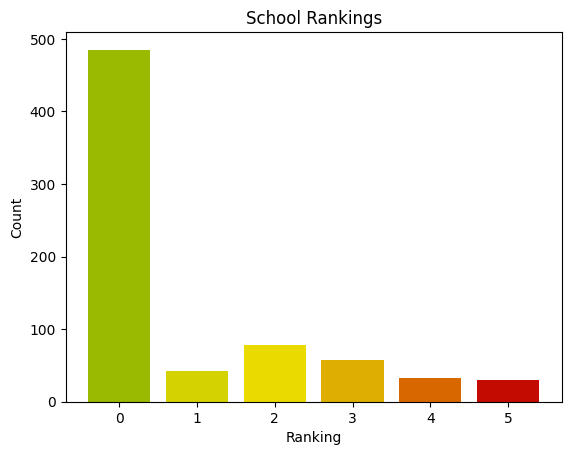

In [30]:
ranking_counts = df['School Rankings #'].value_counts().sort_index()

#colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black']
# Plot the data with assigned colors
plt.bar(ranking_counts.index, ranking_counts.values, color=background_colors)
plt.xlabel('Ranking')
plt.ylabel('Count')
plt.title('School Rankings')
plt.show()

In [36]:
florida = pd.DataFrame(columns=df.columns)
florida

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N),School Rankings #,School Rankings Text


In [37]:
for index, row in df.iterrows():
    #print(row['College/University'])
    if 'Florida' in row['College/University']:
        length = len(florida)
        florida.loc[length] = row

In [38]:
florida

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N),School Rankings #,School Rankings Text
0,"University of Florida, Gainesville",3 - Significant,12,Yes,8,No,3,Significant
1,Florida International University,1 - Minimal,7,No,0,No,1,Minimal
2,Florida State University,0 - Negligible,5,No,0,No,0,Negligible
3,University of South Florida,0 - Negligible,4,No,0,No,0,Negligible
4,Eastern Florida State College,0 - Negligible,0,No,0,No,0,Negligible
5,Florida Atlantic University,0 - Negligible,0,No,0,No,0,Negligible
6,Florida Gulf Coast University,0 - Negligible,0,No,0,No,0,Negligible
7,Florida Institute Of Technology,0 - Negligible,1,No,0,No,0,Negligible
8,Florida Keys Community College,0 - Negligible,0,No,0,No,0,Negligible
9,Florida Southern College,0 - Negligible,0,No,0,No,0,Negligible


In [42]:
extreme_anti_zionist_schools = df[df['School Rankings #'] == 5]
extreme_anti_zionist_schools.head()

,College/University,School Rankings,# Faculty Boycotters,FJP (Y/N),FJP Events & Statements,Depts w/Statements (Y/N),School Rankings #,School Rankings Text
0,New York University (NYU),5 - Extreme,123,Yes,44,Yes,5,Extreme
1,University of Minnesota Twin Cities,5 - Extreme,38,Yes,54,Yes,5,Extreme
2,Columbia University/Barnard College,5 - Extreme,72,Yes,27,Yes,5,Extreme
3,University of California Santa Cruz (UCSC),5 - Extreme,38,Yes,40,Yes,5,Extreme
4,University of Washington,5 - Extreme,76,Yes,21,Yes,5,Extreme


In [43]:
len(extreme_anti_zionist_schools)

30

In [47]:
extreme_anti_zionist_schools[['College/University', 'FJP (Y/N)']] 

,College/University,FJP (Y/N)
0,New York University (NYU),Yes
1,University of Minnesota Twin Cities,Yes
2,Columbia University/Barnard College,Yes
3,University of California Santa Cruz (UCSC),Yes
4,University of Washington,Yes
5,Georgetown University,Yes
6,University of California Los Angeles (UCLA),Yes
7,CUNY The Graduate Center,Yes
8,University of California Irvine (UCI),Yes
9,University of Hawaii Manoa,Yes


In [48]:
extreme_anti_zionist_schools.describe()

,# Faculty Boycotters,FJP Events & Statements,School Rankings #
count,30.000000,30.000000,30.0
mean,49.466667,21.666667,5.0
std,23.748297,10.933445,0.0
min,23.000000,8.000000,5.0
25%,31.000000,14.000000,5.0
50%,41.000000,20.500000,5.0
75%,59.000000,26.000000,5.0
max,123.000000,54.000000,5.0


In [49]:
len(df[df['FJP (Y/N)'] == 'Yes'])

181